<a href="https://colab.research.google.com/github/kuanysh-zhaksylyk/ml_training/blob/main/ML_SELFEDU_TRAINING31_Nadaraya_Watson_Estimator_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

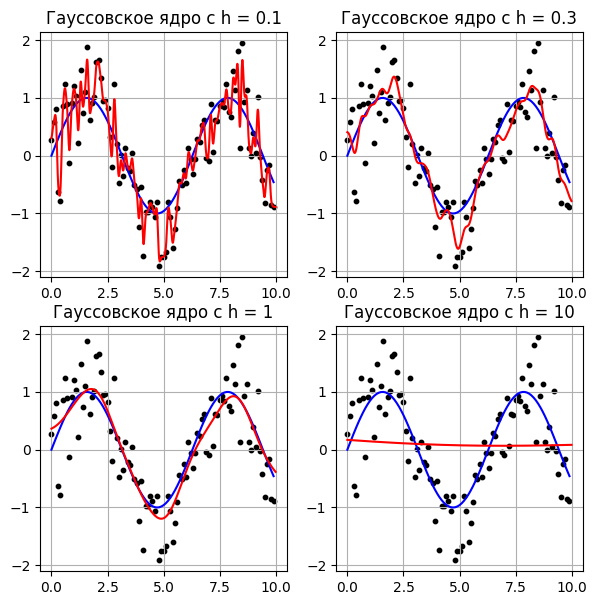

In [ ]:
# Аппроксимация данных ядерным сглаживанием

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)           # отсчеты для исходного сигнала
x_est = np.arange(0, 10, 0.01)      # отсчеты, где производится восстановление функции
N = len(x)
y_sin = np.sin(x)
y = y_sin + np.random.normal(0, 0.5, N)

# аппроксимация ядерным сглаживанием
h = 1.0     # при окне меньше 0.1 для финитных ядер будут ошибки

K = lambda r: np.exp(-2 * r * r)        # гауссовское ядро
# K = lambda r: np.abs(1 - r) * bool(r <= 1)        # треугольное ядро
# K = lambda r: bool(r <= 1)        # прямоугольное ядро

ro = lambda xx, xi: np.abs(xx - xi)     # метрика
w = lambda xx, xi: K(ro(xx, xi) / h)    # веса

plt.figure(figsize=(7, 7))
plot_number = 0

for h in [0.1, 0.3, 1, 10]:
    y_est = []
    for xx in x_est:
        ww = np.array([w(xx, xi) for xi in x])
        yy = np.dot(ww, y) / sum(ww)            # формула Надарая-Ватсона
        y_est.append(yy)

    plot_number += 1
    plt.subplot(2, 2, plot_number)

    plt.scatter(x, y, color='black', s=10)
    plt.plot(x, y_sin, color='blue')
    plt.plot(x_est, y_est, color='red')
    plt.title(f"Гауссовское ядро с h = {h}")
    plt.grid()

plt.show()
